In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [133]:
df = pd.read_csv('./pandas-numpy-practices/galaxy.csv')  

In [134]:
df.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


# eda

In [135]:
df.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


In [138]:
df.columns

Index(['BuyItNow', 'startprice', 'carrier', 'color', 'productline',
       'noDescription', 'charCountDescription', 'upperCaseDescription',
       'sold'],
      dtype='object')

<AxesSubplot:xlabel='productline', ylabel='startprice'>

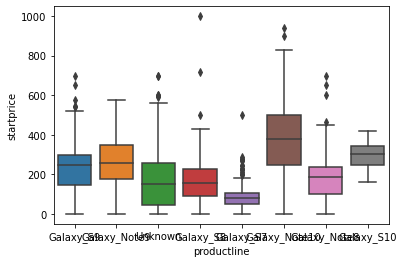

In [145]:
#plt.figure(figsize=(10.10))
sns.boxplot(x='productline', y="startprice", data=df)

In [102]:
df.groupby('carrier')['startprice'].mean().sort_values(ascending=False)

carrier
Sprint/T-Mobile    307.216538
Verizon            234.781724
AT&T               209.773446
None               207.885307
Name: startprice, dtype: float64

In [101]:
df.groupby('color')['sold'].sum()

color
Aura Black          6
Black              16
Gold               18
Midnight Black    153
Prism Black         0
Space Gray         81
White             143
Name: sold, dtype: int64

In [103]:
df.groupby('color')['startprice'].mean()

color
Aura Black        319.457368
Black             159.865263
Gold              443.593846
Midnight Black    145.545000
Prism Black       299.000000
Space Gray        276.767389
White             242.726768
Name: startprice, dtype: float64

In [15]:
df.isna().sum()

BuyItNow                  0
startprice                0
carrier                 306
color                   593
productline               0
noDescription             0
charCountDescription      0
upperCaseDescription      0
sold                      0
dtype: int64

In [18]:
df['carrier'].value_counts()

None               863
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

In [17]:
df['color'].value_counts()

White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: color, dtype: int64

In [32]:
df_cp = df.copy()
df_cp['has_color'] = df_cp['color'].apply(lambda x: 1 if type(x) == str else 0)
df_cp['has_carrier'] = df_cp['carrier'].apply(lambda x: 1 if type(x) == str else 0)

In [34]:
df_cp.corr()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,has_color,has_carrier
BuyItNow,1.000000,-0.456724,-0.092170,-0.018091,0.540054,0.025848,0.028258
startprice,-0.456724,1.000000,-0.079081,-0.036946,-0.443617,0.090669,-0.026231
charCountDescription,-0.092170,-0.079081,1.000000,0.394730,-0.073461,-0.023907,0.022520
upperCaseDescription,-0.018091,-0.036946,0.394730,1.000000,-0.058993,0.030220,-0.021189
sold,0.540054,-0.443617,-0.073461,-0.058993,1.000000,0.013619,0.057965
has_color,0.025848,0.090669,-0.023907,0.030220,0.013619,1.000000,0.169309
has_carrier,0.028258,-0.026231,0.022520,-0.021189,0.057965,0.169309,1.000000


In [58]:
diffs1 = [(color,carrier) for (color, carrier) in np.array(df_cp[['has_color', 'has_carrier']])\
            if color != carrier]
diffs2 = [(color,carrier) for (color, carrier) in np.array(df_cp[['has_color', 'has_carrier']])\
            if (color == 0) and (carrier==0)]

# 어느 하나만 누락됨 555개
# 둘 다 누락됨 172개
len(diffs1), len(diffs2)

(555, 172)

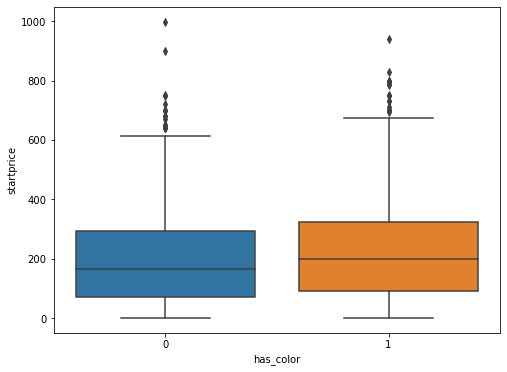

In [51]:
data = pd.concat([df_cp['has_color'], df_cp['startprice']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='has_color', y="startprice", data=data)

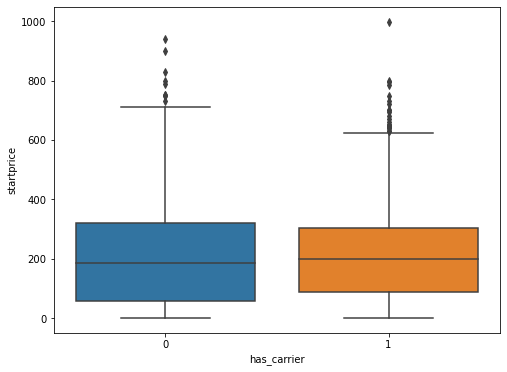

In [52]:
data = pd.concat([df_cp['has_carrier'], df_cp['startprice']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='has_carrier', y="startprice", data=data)

In [61]:
for col in df.columns:
    if col not in ['startprice', 'charCountDescription', 'upperCaseDescription']:
        print(col, len(df[col].unique()), df[col].unique())

BuyItNow 2 [0 1]
carrier 5 ['None' nan 'AT&T' 'Sprint/T-Mobile' 'Verizon']
color 8 ['White' nan 'Space Gray' 'Midnight Black' 'Aura Black' 'Gold' 'Black'
 'Prism Black']
productline 8 ['Galaxy_S9' 'Galaxy_Note9' 'Unknown' 'Galaxy_S8' 'Galaxy_S7'
 'Galaxy_Note10' 'Galaxy_Note8' 'Galaxy_S10']
noDescription 2 ['contains description' 'no description']
sold 2 [1 0]


# 결측치가 포함된 컬럼을 삭제

In [65]:
y = df['sold']
X = df.loc[:, :"upperCaseDescription"]
X = X.drop(['carrier', 'color'], axis=1)
X = pd.concat([X, pd.get_dummies(X['productline'], prefix='productline', drop_first=True)], axis=1)

In [67]:
X = X.drop('productline', axis=1)
X['noDescription'] = X['noDescription'].apply(lambda x: 1 if x == 'contains description' else 0)
X.head()

,BuyItNow,startprice,noDescription,charCountDescription,upperCaseDescription,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown
0,0,199.99,1,0,0,0,0,0,0,0,1,0
1,0,235.00,1,0,0,0,1,0,0,0,0,0
2,0,199.99,0,100,2,0,0,0,0,0,0,1
3,1,175.00,1,0,0,0,1,0,0,0,0,0
4,1,100.00,1,0,0,0,0,0,0,1,0,0


In [109]:
df['carrier'].value_counts()

None               863
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

In [110]:
df['color'].value_counts()

White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: color, dtype: int64

# 결측치가 포함된 행을 삭제

In [119]:
df = df.dropna(how='any', axis=0)

In [120]:
df = pd.concat([df, pd.get_dummies(df['productline'], prefix='productline', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['carrier'], prefix='carrier', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['color'], prefix='color', drop_first=True)], axis=1)
df = df.drop(['productline', 'carrier', 'color'], axis=1)

In [121]:
df['noDescription'] = df['noDescription'].apply(lambda x: 1 if x == 'contains description' else 0)

In [122]:
df.head()

,BuyItNow,startprice,noDescription,charCountDescription,upperCaseDescription,sold,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,...,productline_Unknown,carrier_None,carrier_Sprint/T-Mobile,carrier_Verizon,color_Black,color_Gold,color_Midnight Black,color_Prism Black,color_Space Gray,color_White
0,0,199.99,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,175.00,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,100.00,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
6,1,150.00,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7,0,199.99,0,92,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [125]:
df['sold']

0       1
3       1
4       1
6       1
7       1
       ..
1479    1
1481    1
1482    0
1483    1
1484    0
Name: sold, Length: 758, dtype: int64

In [126]:
y = df['sold']
X = df.drop('sold', axis=1)

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [128]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# y = np.array([1, 1, 1, 2, 2, 2])

eclf1 = VotingClassifier(estimators=[
         ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
eclf1_pred = eclf1.predict(X_test)

np.array_equal(eclf1.named_estimators_.lr.predict(X_test),
                eclf1.named_estimators_['lr'].predict(X_test))

eclf2 = VotingClassifier(estimators=[
         ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
         voting='soft')
eclf2 = eclf2.fit(X_train, y_train)
eclf2_pred = eclf2.predict(X_test)


eclf3 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
        voting='soft', weights=[2,1,1],
        flatten_transform=True)
eclf3 = eclf3.fit(X_train, y_train)
eclf3_pred = eclf3.predict(X_test)
print(eclf3.transform(X_test).shape)

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

(152, 6)


/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [129]:
accuracy_score(y_test, eclf1_pred)

0.75

In [130]:
accuracy_score(y_test, eclf2_pred)

0.7236842105263158

In [131]:
accuracy_score(y_test, eclf3_pred)

0.743421052631579

# RF

In [79]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[50, 100, 150],
    'criterion':['gini', 'entropy'],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[8, 12, 18],
    'min_samples_split':[8, 16, 20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [50, 100, 150]})

In [80]:
grid_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 20,
 'n_estimators': 50}

In [81]:
pred = grid_cv.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.7811447811447811

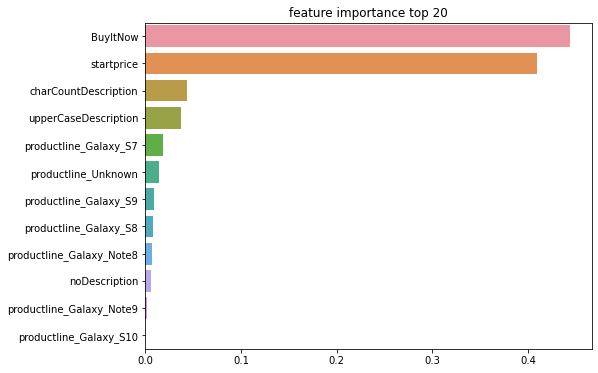

In [82]:
ftr_importances_values = grid_cv.best_estimator_.feature_importances_
ftr_importances_values = pd.Series(ftr_importances_values, index=X_train.columns)

ftr_top20 = ftr_importances_values.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('feature importance top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [83]:
%%time

from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_accuracy

CPU times: user 149 ms, sys: 10.3 ms, total: 160 ms
Wall time: 186 ms


0.797979797979798

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',
                               max_depth=12,
                               min_samples_leaf=8,
                               min_samples_split=8,
                               #n_estimators=150,
                               random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.7878787878787878